In [1]:
from sklearn.datasets import load_breast_cancer
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_ = load_breast_cancer()

In [3]:
dir(data_)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
data = pd.DataFrame(data_.data,columns=data_.feature_names)

In [5]:
data['cancer'] = data_.target
data['desc'] = data.cancer.apply(lambda x:data_.target_names[x])

In [6]:
data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer,desc
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant


#### so cancer = 0 means it is malign(need treatment) and cancer = 1 means it is benign(no worries)

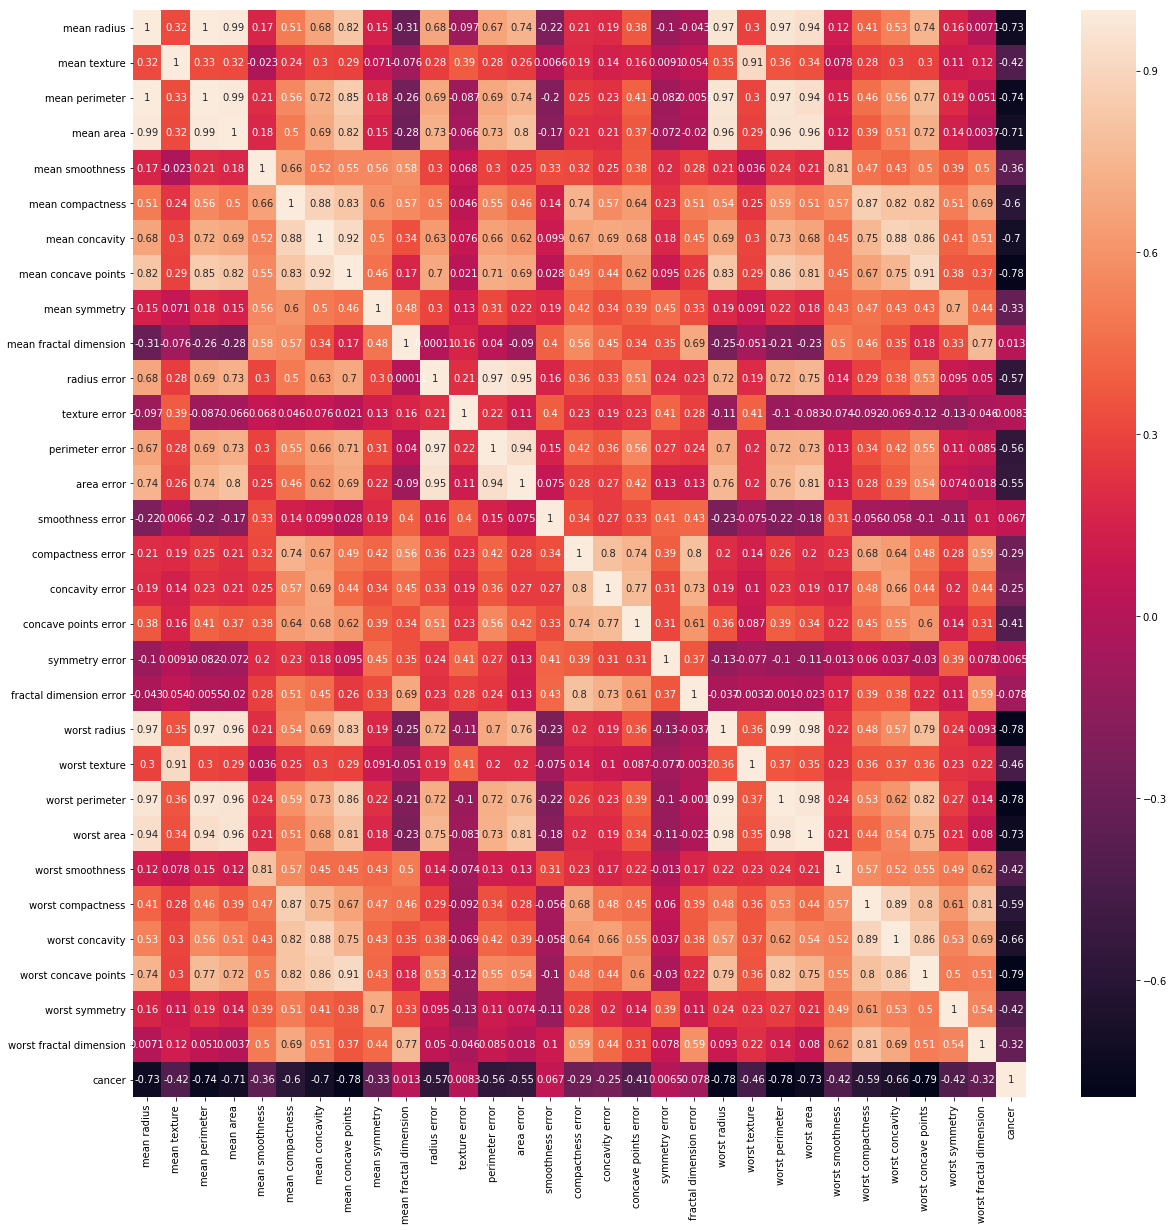

In [7]:
f,ax=plt.subplots(figsize=(20,20))
sb.heatmap(data.corr(),annot=True)

#### overall, notice a lot of Independent variables are highly corelated with other IV(Multi-collinearity) problem
This is bad. why ?
- First of all having such features is redundant, since they can be easily derived from other independent var
- second, because it hampers the weight of coefficients(of predictors) in our linear regression model
        - Mechanism of deriving the coefficients: 
            - We determine the coefficient of predictors by taking each IV at a time and see the effect of 1 unit change in predictor x1 causes how much change in DV
        - Now if our predictors/IV are higly related with each other, then we can't be sure that of 1 unit increase in x1 caused the change in DV alone or some contribution came from other highly corelated variables we have in our predictor set and that would effect the weights and sign of the coefficients that Linear model assigns to our predictor set

PS: IV stands for Independent variable, DV - Dependent variable

### Now either we can run vif analysis and delete predictors with vif value >10 or else use PCA to remove those

## variation inflation factor 
- Here we will try see the r-square coefficient(coeff of determiniation) for each of the predictors from other variables in the dataset.
Our aim is to see how much of each IV/predictor can be described from others. 
- If r2 is high, which means that vif will be high as well and we dont need to carry that IV in our model, since we can actually derive that from other columns in the dataset

### vif manually

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
data =data.drop('desc',axis=1)#no need

In [10]:
data.shape

(569, 31)

vif for mean radius is 3806.1152963979675
vif for mean texture is 11.884048056361816
vif for mean perimeter is 3786.4004189336606
vif for mean area is 347.87865745599777
vif for mean compactness is 50.50516769036958
vif for mean concavity is 70.76772019653623
vif for mean concave points is 60.04173274749714
vif for mean fractal dimension is 15.756977231984722
vif for radius error is 75.4620272651135
vif for perimeter error is 70.35969456180788
vif for area error is 41.16309127170669
vif for compactness error is 15.366324437911372
vif for concavity error is 15.69483346231033
vif for concave points error is 11.52079621319453
vif for worst radius is 799.1059459432471
vif for worst texture is 18.569966378042682
vif for worst perimeter is 405.0233358697263
vif for worst area is 337.2219243968855
vif for worst smoothness is 10.923060898132226
vif for worst compactness is 36.982754652706646
vif for worst concavity is 31.970723015902546
vif for worst concave points is 36.76371359026097
vif for

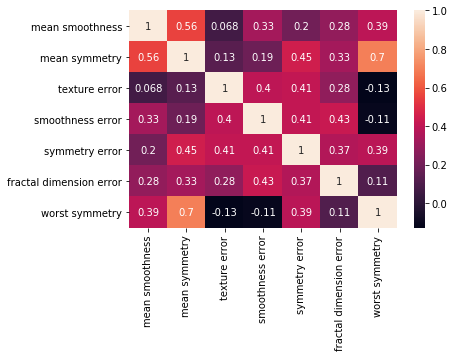

In [11]:
skip_list = ['cancer']
predictors = data.drop(skip_list,axis=1)
#predictors = data.drop(['cancer','mean area','mean perimeter','worst area','worst perimeter'],axis=1)
THR = 10
keep = {}

for col in predictors.columns:
    iv = predictors.drop([col],axis=1)#predictor acts as the DV and all others are IV
    dv = predictors.loc[:,col]
    #print(iv.head(1),dv.head(1))
    model = LinearRegression().fit(iv,dv)
    vif = 1/(1-model.score(iv,dv))
    
    if vif >THR:
        print('vif for %s is %s'%(col,vif))
        skip_list.append(col)
    else:
        keep[col] = vif
sb.heatmap(data[keep].corr(),annot=True)

#### in the keep list, we still have 0.7 correlations, let us remove those also

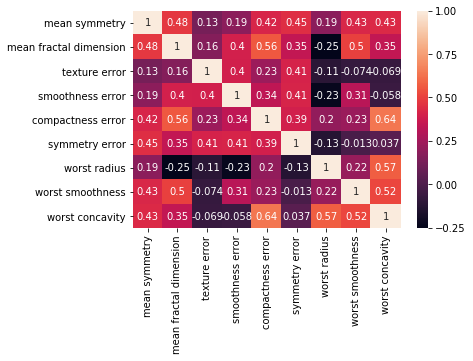

In [12]:
skip_list = ['cancer','mean area','mean perimeter','worst area','worst perimeter',\
                       'mean compactness','perimeter error','area error','mean concave points',\
                        'mean radius','mean concavity','radius error','worst concave points',
                       'worst compactness','worst texture','concavity error','concave points error',\
                        'mean texture','worst fractal dimension','mean smoothness','fractal dimension error',
            'worst symmetry']
predictors = data.drop(skip_list,axis=1)
#predictors = data.drop(['cancer','mean area','mean perimeter','worst area','worst perimeter'],axis=1)
THR = 10
keep = {}

for col in predictors.columns:
    iv = predictors.drop([col],axis=1)#predictor acts as the DV and all others are IV
    dv = predictors.loc[:,col]
    #print(iv.head(1),dv.head(1))
    model = LinearRegression().fit(iv,dv)
    vif = 1/(1-model.score(iv,dv))
    
    if vif >THR:
        print('vif for %s is %s'%(col,vif))
        skip_list.append(col)
    else:
        keep[col] = vif
sb.heatmap(data[keep].corr(),annot=True)

#### now all corelations are below 0.7

In [13]:
import pprint
print('Keeping :\n')
pprint.pprint(keep)
print('\n and skipping',len(skip_list))

Keeping :

{'compactness error': 3.909013241473594,
 'mean fractal dimension': 3.2984249431525323,
 'mean symmetry': 1.9155967295660794,
 'smoothness error': 2.264884869631891,
 'symmetry error': 1.8941773730690412,
 'texture error': 1.360134131968254,
 'worst concavity': 4.6263063597551755,
 'worst radius': 2.471100564819139,
 'worst smoothness': 3.100027427139725}

 and skipping 22


#### see out of 30 predictors, 22 are having multicollinearity issue, and only 8 are good to go

## let us see distribution of var

(count    569.000000
 mean      14.127292
 std        3.524049
 min        6.981000
 25%       11.700000
 50%       13.370000
 75%       15.780000
 max       28.110000
 Name: mean radius, dtype: float64,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d50597a860>)

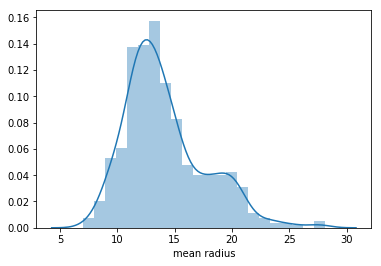

In [14]:
data['mean radius'].describe(),sb.distplot(data['mean radius'])

In [15]:
def normalize(data):
    norm_data = data
    for i,col in enumerate(range(data.shape[1])):
        norm_data.iloc[:,col] = (data.iloc[:,col] - data.iloc[:,col].min())/(data.iloc[:,col].max()-data.iloc[:,col].min()) 
    
    return norm_data

def standardization(data):
    for i,col in enumerate(range(data.shape[1])):
        data.iloc[:,col] = (data.iloc[:,col] - data.iloc[:,col].mean())/(data.iloc[:,col].std()) 
    
    return data

In [16]:
data.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0


In [17]:
bk=data.copy()
norm_data = normalize(data.drop('cancer',axis=1))
norm_data.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.70314,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.66831,0.450698,0.601136,0.619292,0.56861,0.912027,0.598462,0.418864


In [18]:
std_data = standardization(bk.copy().drop('cancer',axis=1))

### with all the predictors

In [19]:
from sklearn.model_selection import train_test_split
iv = data.drop('cancer',axis=1)#predictor acts as the DV and all others are IV
dv = data.cancer
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size=0.2,random_state=42)
model = LinearRegression().fit(iv_train,dv_train)
model.score(iv_test,dv_test)

0.7271016126223548

### with multi-collinearity removed

In [20]:
iv = data[list(keep.keys())]#+['worst radius','worst concave points']]#predictor acts as the DV and all others are IV
dv = data.cancer
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size=0.2,random_state=42)
model = LinearRegression().fit(iv_train,dv_train)
model.score(iv_test,dv_test)

0.7333273982878085

### We see our model performed better

### scatter plots

In [21]:
d1 = data[list(keep.keys())+['cancer']]
d1.head(1)

,mean symmetry,mean fractal dimension,texture error,smoothness error,compactness error,symmetry error,worst radius,worst smoothness,worst concavity,cancer
0,0.2419,0.07871,0.9053,0.006399,0.04904,0.03003,25.38,0.1622,0.7119,0


Text(0, 0.5, 'worst radius')

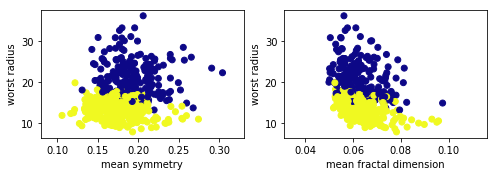

In [22]:
f,ax=plt.subplots(figsize=(8,8))
pltno=321
plt.subplot(pltno)
plt.scatter(d1['mean symmetry'],d1['worst radius'],c=d1.cancer,cmap='plasma')
plt.xlabel('mean symmetry')
plt.ylabel('worst radius')
pltno=322
plt.subplot(pltno)
plt.scatter(d1['mean fractal dimension'],d1['worst radius'],c=d1.cancer,cmap='plasma')
plt.xlabel('mean fractal dimension')
plt.ylabel('worst radius')

#### we see a straight line can do very well in drwaing the line here

### vif using variance_inflation_factor

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
vif = pd.DataFrame()
predictors_df = data.drop(['cancer'],axis=1)
vif["VIF"] = [variance_inflation_factor(predictors_df.values, i) for i in range(predictors_df.shape[1])]
vif["features"] = predictors_df.columns
vif        

,VIF,features
0,63306.172036,mean radius
1,251.047108,mean texture
2,58123.586079,mean perimeter
3,1287.262339,mean area
4,393.398166,mean smoothness
5,200.980354,mean compactness
6,157.855046,mean concavity
7,154.241268,mean concave points
8,184.426558,mean symmetry
9,629.679874,mean fractal dimension


#### It suggests that all are so highly corelated, that's absurd
- TBD : why so different from our manual calculation

## feature selection

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [27]:
iv = data.drop('cancer',axis=1)
dv = data['cancer']
THR=10
bestfeatures = SelectKBest(score_func=chi2, k=THR)
fit = bestfeatures.fit(iv, dv)

score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(iv.columns)

feature_select = pd.concat([features,score], axis =1)
feature_select.columns = ['feature', 'score']
feature_select.nlargest(THR,'score')
ind = feature_select.nlargest(8,'score').index

In [28]:
iv = data.iloc[:,ind]
dv = data['cancer']
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size=0.2,random_state=42)
model = LinearRegression().fit(iv_train,dv_train)
model.score(iv_test,dv_test)

0.720630859581332

#### not working best as the features it seleted are based on highest correlation with DV, but all these have multi-collinearoty issue

## Principal component analysis PCA

### standard scaler

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler().fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
scaled_data = scaler.transform(data)

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)

In [34]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [35]:
x = pca.transform(scaled_data)

#### converted 30 columns to 2 

Text(0.5, 0, 'mean fractal dimension')

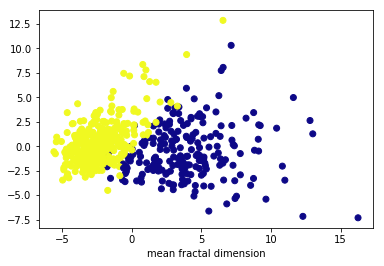

In [36]:
plt.scatter(x[:,0],x[:,1],c=data.cancer,cmap='plasma')
plt.xlabel('mean fractal dimension')

In [37]:
x[1]

array([ 2.6558016 , -3.78477586])

In [38]:
df = pd.DataFrame(data=x,columns=['feat1','feat2'])
target = pd.DataFrame(data_['target'])
df = pd.concat([df,target],axis=1).rename(columns={0:'cancer'})
df.head(1)

,feat1,feat2,cancer
0,9.22577,2.116196,0


Text(0, 0.5, 'PCA feature 2')

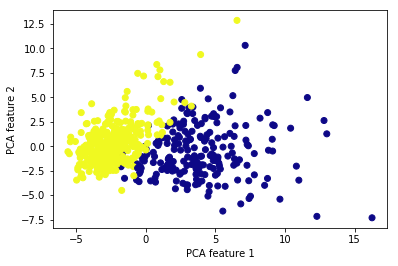

In [39]:
plt.scatter(df.feat1,df.feat2,c=data.cancer,cmap='plasma')
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')

#### that is a pretty good feature discrimination

In [40]:
iv = df[['feat1','feat2']]
dv = df.cancer
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size=0.2,random_state=42)
model = LinearRegression().fit(iv_train,dv_train)
model.score(iv_test,dv_test)

0.7338644219460728

#### score improved a little, but look at the ease of building a model by reducing the dimensions automatically